In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
import graphviz, wavedrom
from IPython.display import display, Markdown

In [2]:
# snail with an Mealy FSM brain
initStateMealy = 'S0'
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunctionMealy = [ ['S0',0,'S1'], ['S0',1,'S0'], ['S1',0,'S1'], ['S1',1,'S0'] ]
# outputFunction Mealy [ [State, inAlphabet, outAlphabet], ...]
outputFunctionMealy = [ ['S0',0,0], ['S0',1,0], ['S1',0,0], ['S1',1,1]]
# short form
brainMealy = FST([], initStateMealy, [], [], transitionFunctionMealy, outputFunctionMealy)
# debug
print(brainMealy.comboStateAndOutDict)

{('S0', 0): ['S1', 0], ('S0', 1): ['S0', 0], ('S1', 0): ['S1', 0], ('S1', 1): ['S0', 1]}


| Input \ State | S0 | S1 |
|:---:|:---:|:---:|
| 0 | S1/0 | S1/0 |
| 1 | S0/0 | S0/1 |


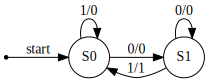

'../util/img\\brainMealy.svg'

In [3]:
# Visualise FST
display(Markdown(brainMealy.toMdTable()))
src = graphviz.Source(brainMealy.toDot())
display(src)
src.render('../util/img/brainMealy', format='svg')

| Input \ State | 0/- | 1/0 | 2/0 | 3/1 |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 1 | 1 | 1 | 1 |
| 1 | 2 | 3 | 2 | 2 |


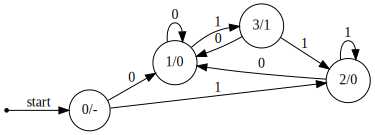

'../util/img\\brainMoore.svg'

In [4]:
# Convert Mealy to Moore
brainMoore = brainMealy.asMoore()
display(Markdown(brainMoore.toMdTable()))
src = graphviz.Source(brainMoore.toDot())
display(src)
src.render('../util/img/brainMoore', format='svg')